In [ ]:
# Description: This program uses Fibonacci retracement and MACD to indicate buying and selling moments for cryptocurrencies

In [2]:
# Download packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
print("complete setup")

complete setup


In [3]:
#import common etfs 
date_of_series = '2015-01-01'


from pandas_datareader import data
bitcoin = data.DataReader('BTC-USD', 'yahoo', date_of_series)
bitcoin['Date'] = bitcoin.index
display(bitcoin)

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993,2015-01-01
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013,2015-01-02
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001,2015-01-03
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007,2015-01-04
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999,2015-01-05
...,...,...,...,...,...,...,...
2021-09-09,47031.742188,44344.484375,46396.664062,44883.910156,3.915467e+10,44883.910156,2021-09-09
2021-09-10,45969.292969,44818.265625,44869.839844,45201.457031,3.449984e+10,45201.457031,2021-09-10
2021-09-11,46364.878906,44790.460938,45206.628906,46063.269531,2.788198e+10,46063.269531,2021-09-11


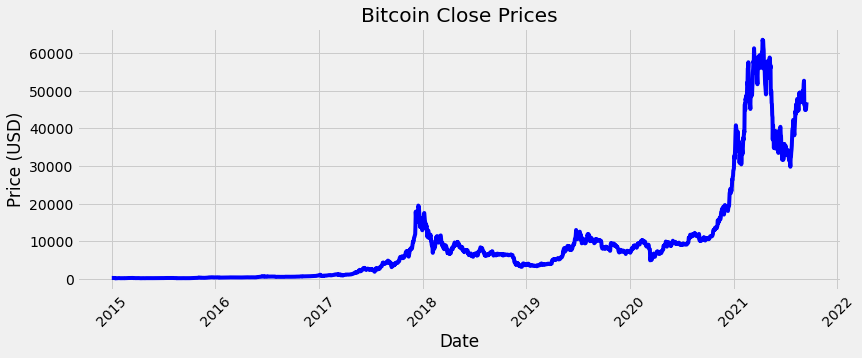

In [5]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(bitcoin["Close"], color="blue")
plt.title("Bitcoin Close Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

In [6]:
#Calculate the fibonacci retracement lines
maximum_price = bitcoin["Close"].max()
minimum_price = bitcoin["Close"].min()

difference = maximum_price - minimum_price

"""The first Fibonacci retracement ratio is determined by dividing a fibonacci number
by the number to the immediate right --> 0.236"""
first_level = maximum_price - difference*0.236

"""The second fibonacci retracement ratio is derived by dividing a fibonacci number
by the number second to the right --> 0.382"""
second_level = maximum_price - difference*0.328

"""While 0.50 is not a fibonacci number, it is helpful to include as a midpoint"""
mid_level = maximum_price - difference*0.5

"""The third fibonacci retracement ratio is derived by dividing a fibonacci number
by the number third to the right --> 0.618"""
third_level = maximum_price - difference*0.618

"""The fourth fibonacci retracement ratio is derived by dividing a fibonacci number
by the number fourth to the right --> 0.786"""
fourth_level = maximum_price - difference*0.786

In [7]:
# Calculate the MACD and the Signal Line indicators

#Calculate the short term exponential moving average(EMA)
short_EMA = bitcoin["Close"].ewm(span=12, adjust=False).mean()

#Calculate the long term exponential moving average(EMA)
long_EMA = bitcoin["Close"].ewm(span=26, adjust=False).mean()

#Calculate the moving average convergence/divergence (MACD)
MACD = short_EMA - long_EMA

#Caluclate the Signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

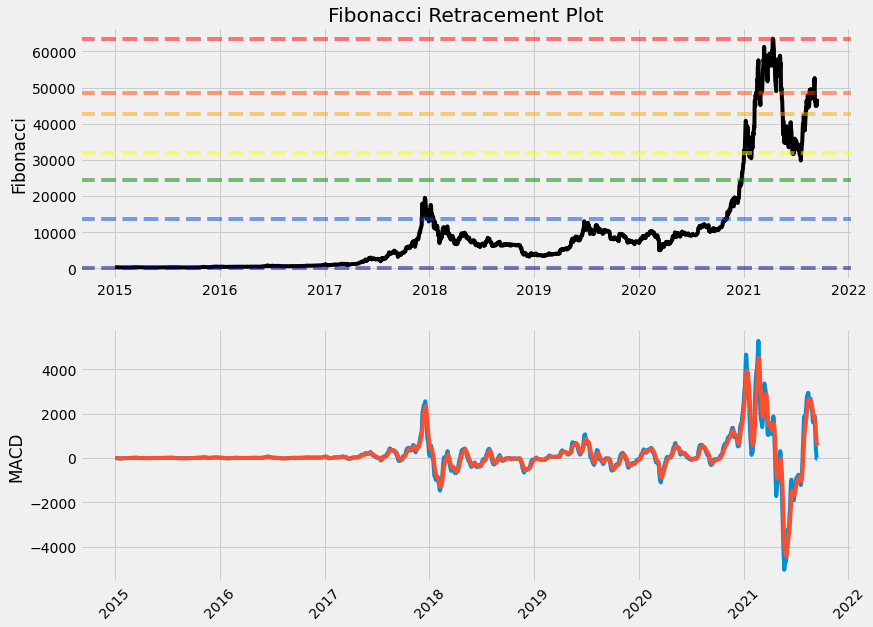

In [8]:
# Plot the Fibonacci levels, close price and MACD and Signal indicators on a graph
new_bitcoin = bitcoin
plt.figure(figsize=(12.33, 9.5))
plt.subplot(2,1,1)
plt.title("Fibonacci Retracement Plot")
plt.plot(new_bitcoin.index, new_bitcoin["Close"], color="black")

# Fibonacci Lines
plt.axhline(maximum_price, linestyle="--", alpha=0.5, color="red")
plt.axhline(first_level, linestyle="--", alpha=0.5, color="#FF4500")
plt.axhline(second_level, linestyle="--", alpha=0.5, color="#FFA500")
plt.axhline(mid_level, linestyle="--", alpha=0.5, color="yellow")
plt.axhline(third_level, linestyle="--", alpha=0.5, color="green")
plt.axhline(fourth_level, linestyle="--", alpha=0.5, color="#0343DF")
plt.axhline(minimum_price, linestyle="--", alpha=0.5, color="#00008B")
plt.ylabel("Fibonacci")

# Plot the MACD and the Signal Line
plt.subplot(2,1,2)
plt.plot(new_bitcoin.index, MACD)
plt.plot(new_bitcoin.index, signal)
plt.ylabel("MACD")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Create columns for the DataFrame
bitcoin["MACD"] = MACD
bitcoin["Signal Line"] = signal
# Show the new data
display(bitcoin)

,High,Low,Open,Close,Volume,Adj Close,Date,MACD,Signal Line
Date,,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993,2015-01-01,0.000000,0.000000
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013,2015-01-02,0.062463,0.012493
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001,2015-01-03,-2.597573,-0.509521
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007,2015-01-04,-5.999156,-1.607448
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999,2015-01-05,-7.775871,-2.841132
...,...,...,...,...,...,...,...,...,...
2021-09-09,47031.742188,44344.484375,46396.664062,44883.910156,3.915467e+10,44883.910156,2021-09-09,547.921690,1305.845195
2021-09-10,45969.292969,44818.265625,44869.839844,45201.457031,3.449984e+10,45201.457031,2021-09-10,296.055487,1103.887254
2021-09-11,46364.878906,44790.460938,45206.628906,46063.269531,2.788198e+10,46063.269531,2021-09-11,164.099139,915.929631


In [10]:
# Create function to be used in our investment strategy to get the 
# upper Fib level and the lower Fib level of the current price
def get_levels(price):
    if price >= first_level:
        return (maximum_price, first_level)
    elif price >= second_level:
        return (first_level, second_level)
    elif price >= mid_level:
        return (second_level, mid_level)
    elif price >= third_level:
        return (mid_level, third_level)
    elif price >= fourth_level:
        return (third_level, fourth_level)
    else:
        return (fourth_level, minimum_price)

In [20]:
# Create a function for the trading strategy

# The strategy is to buy when the signal line crosses above the MACD line and;
# When the current price crosses below (buy) the last Fib level

#The strategy to sell is the exact opposite (signal crosses below the MACD line and;
# current price crosses above last Fib level)

# Never sell at a price that is lower than I bought

def strategy(df):
    buy_list = []
    sell_list = []
    flag = 0
    last_buy_price = 0
    
    #Loop through the Data set
    for i in range(0, df.shape[0]):
        price = df["Close"][i]
        #Check if this is the first data point within the data set, then get the Fib level above and below
        if i == 0:
            upper_level, lower_level = get_levels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        #Else if the current price is greater than or equal to the upper level, then we should buy
        elif price >= upper_level or price <= lower_level:
            #Check if signal line has crossed above the MACD line
            if df["Signal Line"][i] > df["MACD"][i] and flag == 0:
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                #set the flag level to 1 to indicate that we should buy
                flag = 1
            #Check if the current price is less than or equal to the lower level, then we should sell 
            elif df["Signal Line"][i] < df["MACD"][i] and flag == 1 and price > last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                #Set the flag to 0 to indicate that we should sell
                flag = 0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        
        # Update the new levels
        upper_level, lower_level = get_levels(price)
    
    return buy_list, sell_list


In [21]:
# Create buy and sell columns
buy, sell = strategy(bitcoin)
bitcoin["Buy_Signal_Price"] = buy
bitcoin["Sell_Signal_Price"] = sell

# Show the data
display(bitcoin)

,High,Low,Open,Close,Volume,Adj Close,Date,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993,2015-01-01,0.000000,0.000000,NaN,NaN
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013,2015-01-02,0.062463,0.012493,NaN,NaN
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001,2015-01-03,-2.597573,-0.509521,NaN,NaN
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007,2015-01-04,-5.999156,-1.607448,NaN,NaN
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999,2015-01-05,-7.775871,-2.841132,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,47031.742188,44344.484375,46396.664062,44883.910156,3.915467e+10,44883.910156,2021-09-09,547.921690,1305.845195,NaN,NaN
2021-09-10,45969.292969,44818.265625,44869.839844,45201.457031,3.449984e+10,45201.457031,2021-09-10,296.055487,1103.887254,NaN,NaN
2021-09-11,46364.878906,44790.460938,45206.628906,46063.269531,2.788198e+10,46063.269531,2021-09-11,164.099139,915.929631,NaN,NaN


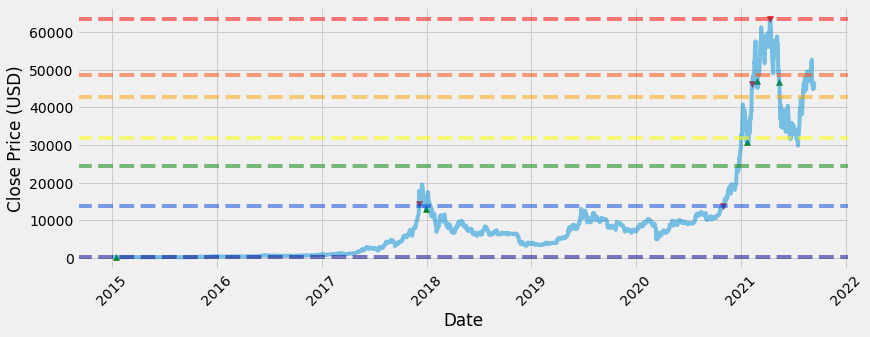

In [29]:
# Plot the Fibonacci levels along with the close price and with the buy and sell signals
new_bitcoin = bitcoin

plt.figure(figsize=(12.33, 4.5))
plt.plot(new_bitcoin.index, new_bitcoin["Close"], alpha=0.5)
plt.scatter(new_bitcoin.index, bitcoin["Buy_Signal_Price"], color="green", marker="^", alpha=1)
plt.scatter(new_bitcoin.index, bitcoin["Sell_Signal_Price"], color="red", marker="v", alpha=1)
# Fibonacci Lines
plt.axhline(maximum_price, linestyle="--", alpha=0.5, color="red")
plt.axhline(first_level, linestyle="--", alpha=0.5, color="#FF4500")
plt.axhline(second_level, linestyle="--", alpha=0.5, color="#FFA500")
plt.axhline(mid_level, linestyle="--", alpha=0.5, color="yellow")
plt.axhline(third_level, linestyle="--", alpha=0.5, color="green")
plt.axhline(fourth_level, linestyle="--", alpha=0.5, color="#0343DF")
plt.axhline(minimum_price, linestyle="--", alpha=0.5, color="#00008B")
plt.ylabel("Close Price (USD)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()